Análisis de modelos generados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

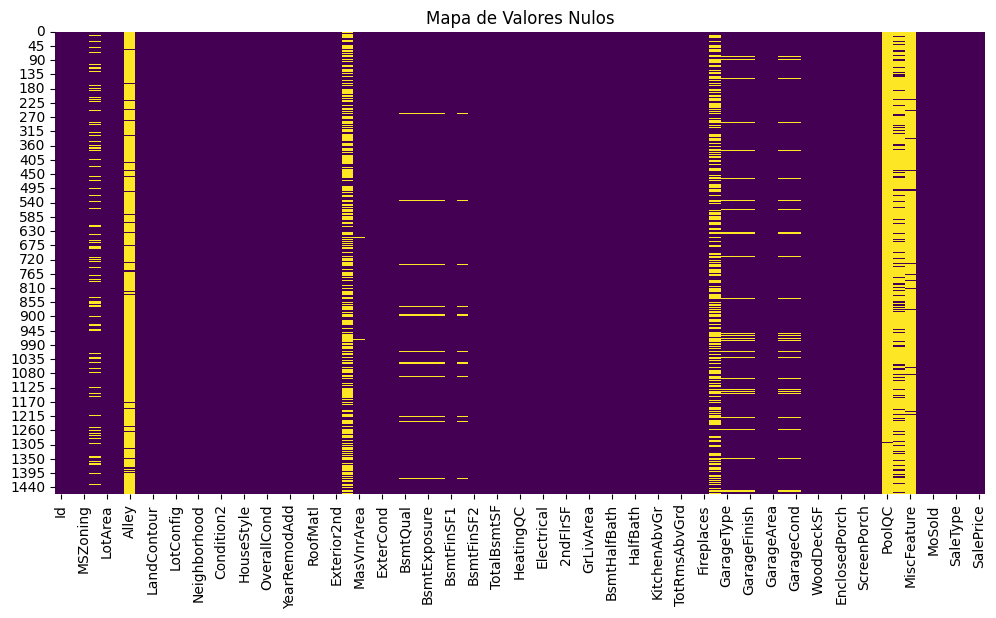

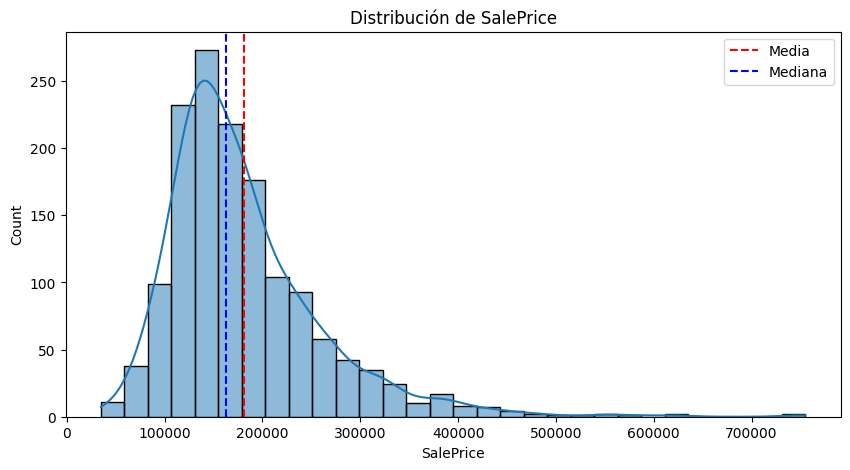

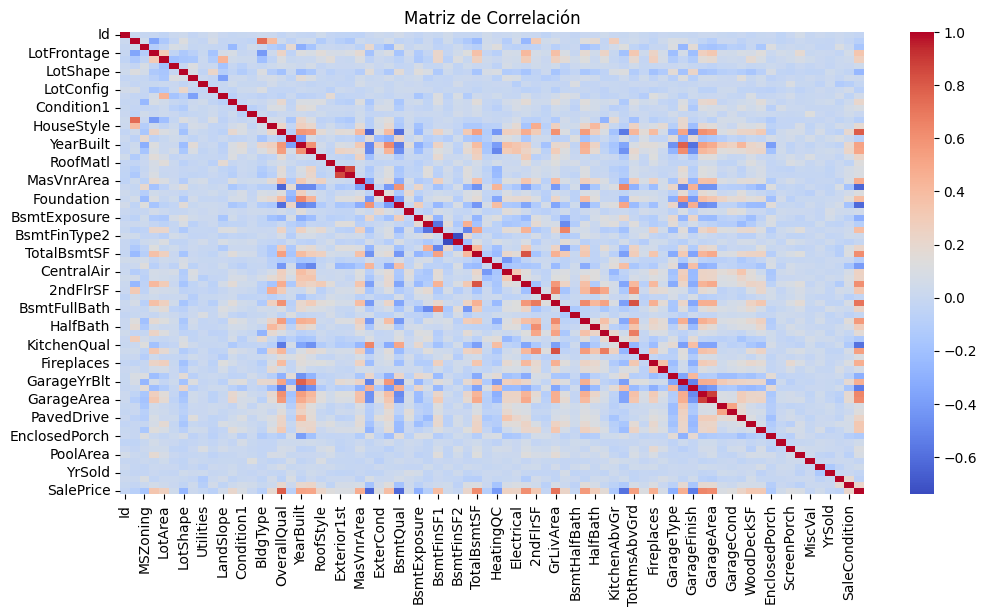

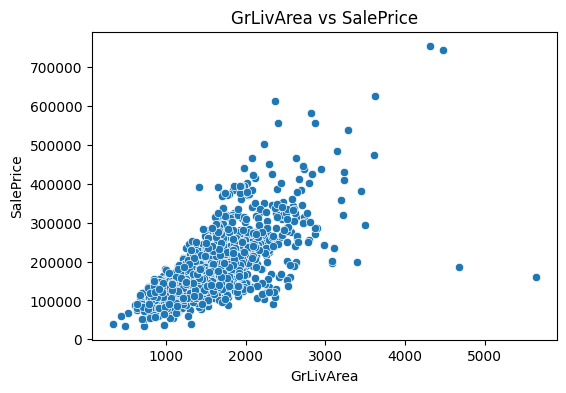

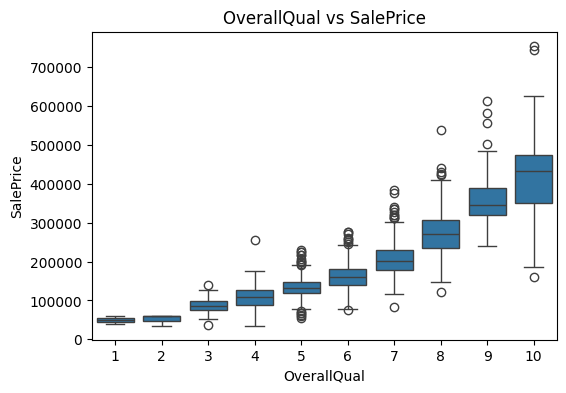

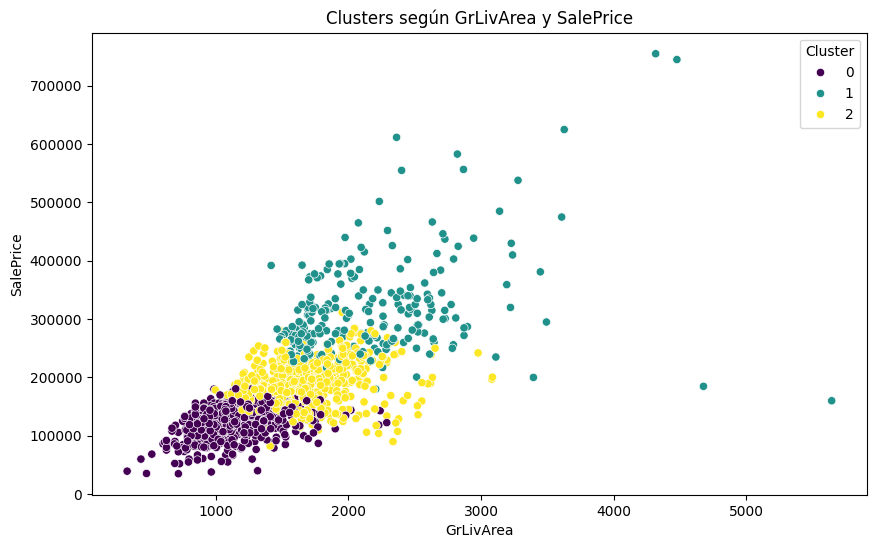

1. Variables más relevantes: OverallQual, GrLivArea, TotalBsmtSF tienen alta correlación con SalePrice.
2. Se encontró sesgo en la distribución de SalePrice, lo que sugiere aplicar una transformación logarítmica.
3. Se eliminaron variables con más del 50% de valores nulos y se imputaron los demás valores.
4. El clustering identificó 3 grupos distintos de casas con características y precios diferenciados.


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar el dataset de entrenamiento
df = pd.read_csv("dataset/train.csv")

# Mostrar las primeras filas
df.head()

# Información general del dataset
df.info()

# Estadísticas descriptivas de las variables numéricas
df.describe()

# Contar valores nulos en cada columna
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Visualización de valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Mapa de Valores Nulos")
plt.show()

# Eliminar columnas con más del 50% de valores nulos
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Imputar valores categóricos con la moda
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Imputar valores numéricos con la mediana
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Convertir variables categóricas a numéricas (opcional)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardar los encoders si se necesitan después

# Distribución de la variable objetivo SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.axvline(df['SalePrice'].mean(), color='red', linestyle='dashed', label="Media")
plt.axvline(df['SalePrice'].median(), color='blue', linestyle='dashed', label="Mediana")
plt.title("Distribución de SalePrice")
plt.legend()
plt.show()

# Matriz de correlación solo con variables numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])  # Seleccionar solo numéricas
plt.figure(figsize=(12, 6))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación")
plt.show()

# Scatter plot entre GrLivArea y SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("GrLivArea vs SalePrice")
plt.show()

# Boxplot de OverallQual vs SalePrice
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("OverallQual vs SalePrice")
plt.show()

# Selección de variables para clustering
features = ["GrLivArea", "TotalBsmtSF", "OverallQual", "SalePrice"]
df_cluster = df[features]

# Estandarización de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicación de K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"], hue=df["Cluster"], palette="viridis")
plt.title("Clusters según GrLivArea y SalePrice")
plt.show()

print("1. Variables más relevantes: OverallQual, GrLivArea, TotalBsmtSF tienen alta correlación con SalePrice.")
print("2. Se encontró sesgo en la distribución de SalePrice, lo que sugiere aplicar una transformación logarítmica.")
print("3. Se eliminaron variables con más del 50% de valores nulos y se imputaron los demás valores.")
print("4. El clustering identificó 3 grupos distintos de casas con características y precios diferenciados.")
